In [ ]:
import openai
import dotenv
import numpy as np
import matplotlib.pyplot as plt
import urllib
import PIL
from matplotlib import image as mpimg

#dotenv.load_dotenv('.env')
openai.api_key = dotenv.get_key(".env", 'OPENAI_API_KEY')

In [ ]:
while True:
    question = input("Enter prompt: ")
    if question.lower() == 'q':
        print('Bye bye')
        break
    response = openai.Completion.create(model="text-davinci-003", prompt=question, n=1, 
                                        temperature=1, top_p = 1, max_tokens=4000)
    print('Response: {}'.format(response.get("choices")[0].get("text").strip("\n")))
                   

Enter image prompt: otter shaking hands with a lion


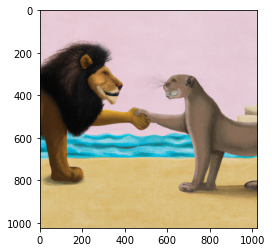

Enter image prompt: q
Bye bye


In [12]:
while True:
    question = input("Enter image prompt: ")
    if question.lower() == 'q':
        print('Bye bye')
        break
        
    response = openai.Image.create(
      prompt=question,
      n=1,
      size="1024x1024"
    )
    image_url = response['data'][0]['url']
    image = np.array(PIL.Image.open(urllib.request.urlopen(image_url)))
    plt.imshow(image)
    plt.show()